In [1]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = "1"

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import torch
import torch.optim

# CODE FILES HERE
from examples.vae.vae import Encoder, Decoder, Vae, PATH
from solver import Solver
from dataloader import DataLoader
from plot import plot_losses, plot_gaussian_distributions, plot_rl_kl, plot_latent_space, plot_latent_space_no_labels, \
plot_latent_manifold, plot_faces_grid, plot_faces_samples_grid

%matplotlib inline
#plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
#plt.rcParams['image.interpolation'] = 'nearest'
#plt.rcParams['image.cmap'] = 'gray'

# for auto-reloading external modules
# see http://stackoverflow.com/questions/1907993/autoreload-of-modules-in-ipython
%load_ext autoreload
%autoreload 2

# supress cluttering warnings in solutions
import warnings
warnings.filterwarnings('ignore')

In [2]:
# setting device on GPU if available, else CPU
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
print('Using device:', device)
print()

#Additional Info when using cuda
if device.type == 'cuda':
    print(torch.cuda.get_device_name(0))
    print('Memory Usage:')
    print('Allocated:', round(torch.cuda.memory_allocated(0)/1024**3,1), 'GB')
    print('Cached:   ', round(torch.cuda.memory_cached(0)/1024**3,1), 'GB')

Using device: cuda:0

Tesla K80
Memory Usage:
Allocated: 0.0 GB
Cached:    0.0 GB


In [3]:
batch_size = 128
optimizer = torch.optim.Adam

In [4]:
# Choose the dataset and tune hyperparameters here!
dataset = "MNIST"

if dataset == "MNIST" or dataset == "EMNIST":
    epochs = 1000
    hidden_dim = 500 # Kingma, Welling use 500 neurons, otherwise use 400
    z_dim = 20
    step_config = {
        "step_size" : -1,
        "gamma" : 0.1
    }
    optim_config = {
        "lr": 1e-3,
        "weight_decay": 0
    }
elif dataset == "LFW":
    epochs = 500
    hidden_dim = 700 # 200 in Kingma for Frey Face but we have highly varying data!
    z_dim = 20
    step_config = {
        "step_size" : 50,
        "gamma" : 0.1
    }
    optim_config = {
        "lr": 1e-2,
        "weight_decay": 1e-5
    }
elif dataset == "FF":
    epochs = 100 # 200 for zdim=20, 500 for zdim=2
    hidden_dim = 200 # as in Kingma
    z_dim = 2
    step_config = {
        "step_size" : 100,
        "gamma" : 0.1
    }
    optim_config = {
        "lr": 1e-3,
        "weight_decay": 0
    }

In [5]:
data_loader = DataLoader(PATH, batch_size, dataset, z_dim)
encoder = Encoder(data_loader.input_dim, hidden_dim, z_dim)
decoder = Decoder(z_dim, hidden_dim, data_loader.input_dim)
model = Vae(encoder, decoder)

In [ ]:
solver = Solver(model, data_loader, optimizer, z_dim, epochs, step_config, optim_config)
solver.run()

+++++ START RUN +++++
====> Epoch: 1 train set loss avg: 160.0294
====> Test set loss avg: 147.4820
8.366737127304077 seconds for epoch 1
====> Epoch: 2 train set loss avg: 119.4145
====> Test set loss avg: 150.2772
8.977190971374512 seconds for epoch 2
====> Epoch: 3 train set loss avg: 113.1234
====> Test set loss avg: 151.5674
8.477729558944702 seconds for epoch 3
====> Epoch: 4 train set loss avg: 110.4641
====> Test set loss avg: 149.6948
8.878304958343506 seconds for epoch 4
====> Epoch: 5 train set loss avg: 108.8608
====> Test set loss avg: 153.3149
9.003398656845093 seconds for epoch 5
====> Epoch: 6 train set loss avg: 107.8012
====> Test set loss avg: 153.0743
8.790862798690796 seconds for epoch 6
====> Epoch: 7 train set loss avg: 107.0535
====> Test set loss avg: 151.7004
8.55733585357666 seconds for epoch 7
====> Epoch: 8 train set loss avg: 106.4643
====> Test set loss avg: 150.2147
8.646502017974854 seconds for epoch 8
====> Epoch: 9 train set loss avg: 105.9629
====> T

====> Epoch: 71 train set loss avg: 100.3806
====> Test set loss avg: 156.3299
9.03320050239563 seconds for epoch 71
====> Epoch: 72 train set loss avg: 100.3256
====> Test set loss avg: 156.6024
8.490752458572388 seconds for epoch 72
====> Epoch: 73 train set loss avg: 100.3299
====> Test set loss avg: 157.5346
8.911203861236572 seconds for epoch 73
====> Epoch: 74 train set loss avg: 100.3099
====> Test set loss avg: 156.9174
9.099812507629395 seconds for epoch 74
====> Epoch: 75 train set loss avg: 100.2878
====> Test set loss avg: 159.6094
8.743974685668945 seconds for epoch 75
====> Epoch: 76 train set loss avg: 100.2463
====> Test set loss avg: 157.1076
8.594675302505493 seconds for epoch 76
====> Epoch: 77 train set loss avg: 100.2728
====> Test set loss avg: 156.8829
8.407471895217896 seconds for epoch 77
====> Epoch: 78 train set loss avg: 100.2119
====> Test set loss avg: 156.9384
8.550606727600098 seconds for epoch 78
====> Epoch: 79 train set loss avg: 100.1448
====> Test s

====> Test set loss avg: 157.5963
8.526170492172241 seconds for epoch 140
====> Epoch: 141 train set loss avg: 99.2448
====> Test set loss avg: 159.1524
8.752760410308838 seconds for epoch 141
====> Epoch: 142 train set loss avg: 99.1848
====> Test set loss avg: 158.9229
8.969931364059448 seconds for epoch 142
====> Epoch: 143 train set loss avg: 99.1759
====> Test set loss avg: 158.8532
8.74337100982666 seconds for epoch 143
====> Epoch: 144 train set loss avg: 99.1487
====> Test set loss avg: 157.5230
8.706544637680054 seconds for epoch 144
====> Epoch: 145 train set loss avg: 99.1368
====> Test set loss avg: 161.2945
8.774341106414795 seconds for epoch 145
====> Epoch: 146 train set loss avg: 99.0937
====> Test set loss avg: 159.8456
8.612662076950073 seconds for epoch 146
====> Epoch: 147 train set loss avg: 99.1104
====> Test set loss avg: 158.5670
9.202850103378296 seconds for epoch 147
====> Epoch: 148 train set loss avg: 99.1121
====> Test set loss avg: 157.5873
8.7907838821411

====> Test set loss avg: 159.5147
8.609063863754272 seconds for epoch 209
====> Epoch: 210 train set loss avg: 98.5706
====> Test set loss avg: 159.3520
8.703447103500366 seconds for epoch 210
====> Epoch: 211 train set loss avg: 98.5881
====> Test set loss avg: 160.0779
8.840324401855469 seconds for epoch 211
====> Epoch: 212 train set loss avg: 98.6196
====> Test set loss avg: 158.0972
9.044820070266724 seconds for epoch 212
====> Epoch: 213 train set loss avg: 98.6190
====> Test set loss avg: 160.9253
9.165045022964478 seconds for epoch 213
====> Epoch: 214 train set loss avg: 98.5906
====> Test set loss avg: 158.0337
8.55111575126648 seconds for epoch 214
====> Epoch: 215 train set loss avg: 98.5948
====> Test set loss avg: 158.4897
8.763829946517944 seconds for epoch 215
====> Epoch: 216 train set loss avg: 98.5763
====> Test set loss avg: 159.6093
8.719993591308594 seconds for epoch 216
====> Epoch: 217 train set loss avg: 98.6160
====> Test set loss avg: 157.3715
8.6711328029632

====> Test set loss avg: 159.8126
8.7293062210083 seconds for epoch 278
====> Epoch: 279 train set loss avg: 98.2827
====> Test set loss avg: 158.9024
8.63310694694519 seconds for epoch 279
====> Epoch: 280 train set loss avg: 98.3025
====> Test set loss avg: 159.4979
8.850552082061768 seconds for epoch 280
====> Epoch: 281 train set loss avg: 98.2966
====> Test set loss avg: 159.4538
8.783010482788086 seconds for epoch 281
====> Epoch: 282 train set loss avg: 98.2212
====> Test set loss avg: 160.3991
9.024055480957031 seconds for epoch 282
====> Epoch: 283 train set loss avg: 98.2508
====> Test set loss avg: 161.3321
8.664100885391235 seconds for epoch 283
====> Epoch: 284 train set loss avg: 98.2480
====> Test set loss avg: 160.2487
9.283464431762695 seconds for epoch 284
====> Epoch: 285 train set loss avg: 98.2356
====> Test set loss avg: 158.5190
8.46190071105957 seconds for epoch 285
====> Epoch: 286 train set loss avg: 98.2596
====> Test set loss avg: 158.3842
8.729366064071655 

====> Test set loss avg: 159.4182
9.348950147628784 seconds for epoch 347
====> Epoch: 348 train set loss avg: 98.0577
====> Test set loss avg: 160.1696
8.744443893432617 seconds for epoch 348
====> Epoch: 349 train set loss avg: 98.0443
====> Test set loss avg: 160.0875
8.672548294067383 seconds for epoch 349
====> Epoch: 350 train set loss avg: 98.0128
====> Test set loss avg: 161.1961
8.737397909164429 seconds for epoch 350
====> Epoch: 351 train set loss avg: 97.9861
====> Test set loss avg: 160.2785
8.532861471176147 seconds for epoch 351
====> Epoch: 352 train set loss avg: 98.0426
====> Test set loss avg: 159.4965
8.90304970741272 seconds for epoch 352
====> Epoch: 353 train set loss avg: 97.9876
====> Test set loss avg: 160.2314
9.133355855941772 seconds for epoch 353
====> Epoch: 354 train set loss avg: 97.9910
====> Test set loss avg: 159.5865
8.738088607788086 seconds for epoch 354
====> Epoch: 355 train set loss avg: 98.0286
====> Test set loss avg: 161.4183
9.0545156002044

====> Test set loss avg: 159.4010
8.887251615524292 seconds for epoch 416
====> Epoch: 417 train set loss avg: 97.8291
====> Test set loss avg: 159.1064
8.949296951293945 seconds for epoch 417
====> Epoch: 418 train set loss avg: 97.8198
====> Test set loss avg: 158.1246
8.673884630203247 seconds for epoch 418
====> Epoch: 419 train set loss avg: 97.8732
====> Test set loss avg: 158.3465
9.189530611038208 seconds for epoch 419
====> Epoch: 420 train set loss avg: 97.8241
====> Test set loss avg: 159.1210
8.375221014022827 seconds for epoch 420
====> Epoch: 421 train set loss avg: 97.8537
====> Test set loss avg: 157.5452
8.981447458267212 seconds for epoch 421
====> Epoch: 422 train set loss avg: 97.7975
====> Test set loss avg: 160.5353
9.270961284637451 seconds for epoch 422
====> Epoch: 423 train set loss avg: 97.8159
====> Test set loss avg: 161.2758
8.79654312133789 seconds for epoch 423
====> Epoch: 424 train set loss avg: 97.8221
====> Test set loss avg: 160.8926
8.9218895435333

====> Test set loss avg: 162.2319
9.265355348587036 seconds for epoch 485
====> Epoch: 486 train set loss avg: 97.6767
====> Test set loss avg: 161.6227
9.208935976028442 seconds for epoch 486
====> Epoch: 487 train set loss avg: 97.6610
====> Test set loss avg: 159.2852
8.613730669021606 seconds for epoch 487
====> Epoch: 488 train set loss avg: 97.6584
====> Test set loss avg: 160.9945
8.847908020019531 seconds for epoch 488
====> Epoch: 489 train set loss avg: 97.6808
====> Test set loss avg: 160.0738
8.766196012496948 seconds for epoch 489
====> Epoch: 490 train set loss avg: 97.7198
====> Test set loss avg: 162.5059
8.942228317260742 seconds for epoch 490
====> Epoch: 491 train set loss avg: 97.6774
====> Test set loss avg: 161.7660
9.007792711257935 seconds for epoch 491
====> Epoch: 492 train set loss avg: 97.6718
====> Test set loss avg: 159.1539
8.835372924804688 seconds for epoch 492
====> Epoch: 493 train set loss avg: 97.6465
====> Test set loss avg: 160.3836
8.595206260681

====> Test set loss avg: 161.3625
8.872918844223022 seconds for epoch 554
====> Epoch: 555 train set loss avg: 97.5591
====> Test set loss avg: 159.4252
8.97417664527893 seconds for epoch 555
====> Epoch: 556 train set loss avg: 97.5620
====> Test set loss avg: 160.7765
8.387625455856323 seconds for epoch 556
====> Epoch: 557 train set loss avg: 97.5318
====> Test set loss avg: 163.2941
8.946300029754639 seconds for epoch 557
====> Epoch: 558 train set loss avg: 97.5389
====> Test set loss avg: 161.9069
9.127639293670654 seconds for epoch 558
====> Epoch: 559 train set loss avg: 97.5736
====> Test set loss avg: 159.2886
9.217198133468628 seconds for epoch 559
====> Epoch: 560 train set loss avg: 97.5325
====> Test set loss avg: 161.3397
8.787636518478394 seconds for epoch 560
====> Epoch: 561 train set loss avg: 97.5477
====> Test set loss avg: 161.8847
8.857015132904053 seconds for epoch 561
====> Epoch: 562 train set loss avg: 97.5481
====> Test set loss avg: 160.7118
9.2660222053527

====> Test set loss avg: 160.1247
9.048309326171875 seconds for epoch 623
====> Epoch: 624 train set loss avg: 97.4736
====> Test set loss avg: 161.0072
8.674702167510986 seconds for epoch 624
====> Epoch: 625 train set loss avg: 97.4647
====> Test set loss avg: 160.1941
9.512010097503662 seconds for epoch 625
====> Epoch: 626 train set loss avg: 97.4201
====> Test set loss avg: 161.7374
8.860406875610352 seconds for epoch 626
====> Epoch: 627 train set loss avg: 97.4265
====> Test set loss avg: 159.1491
8.854290246963501 seconds for epoch 627
====> Epoch: 628 train set loss avg: 97.4278
====> Test set loss avg: 160.1974
9.004058361053467 seconds for epoch 628
====> Epoch: 629 train set loss avg: 97.4406
====> Test set loss avg: 162.0532
8.755874633789062 seconds for epoch 629
====> Epoch: 630 train set loss avg: 97.4252
====> Test set loss avg: 163.1553
9.091985702514648 seconds for epoch 630
====> Epoch: 631 train set loss avg: 97.4136
====> Test set loss avg: 162.5162
9.154225826263

====> Test set loss avg: 160.7152
9.308313846588135 seconds for epoch 692
====> Epoch: 693 train set loss avg: 97.3274
====> Test set loss avg: 161.3351
8.951396942138672 seconds for epoch 693
====> Epoch: 694 train set loss avg: 97.3467
====> Test set loss avg: 161.6365
8.568300247192383 seconds for epoch 694
====> Epoch: 695 train set loss avg: 97.3447
====> Test set loss avg: 160.6356
9.0533287525177 seconds for epoch 695
====> Epoch: 696 train set loss avg: 97.3473
====> Test set loss avg: 160.5703
8.70168685913086 seconds for epoch 696
====> Epoch: 697 train set loss avg: 97.3663
====> Test set loss avg: 160.3486
8.914082765579224 seconds for epoch 697
====> Epoch: 698 train set loss avg: 97.3260
====> Test set loss avg: 163.3763
9.191614866256714 seconds for epoch 698
====> Epoch: 699 train set loss avg: 97.3655
====> Test set loss avg: 160.9928
8.991639375686646 seconds for epoch 699
====> Epoch: 700 train set loss avg: 97.3495
====> Test set loss avg: 162.7888
8.997589826583862

====> Epoch: 762 train set loss avg: 97.2769
====> Test set loss avg: 160.3796
9.034112691879272 seconds for epoch 762
====> Epoch: 763 train set loss avg: 97.3118
====> Test set loss avg: 161.4962
8.812767267227173 seconds for epoch 763
====> Epoch: 764 train set loss avg: 97.2235
====> Test set loss avg: 160.9065
9.081033945083618 seconds for epoch 764
====> Epoch: 765 train set loss avg: 97.2582
====> Test set loss avg: 162.6233
9.147484302520752 seconds for epoch 765
====> Epoch: 766 train set loss avg: 97.2379
====> Test set loss avg: 162.6329
9.0126314163208 seconds for epoch 766
====> Epoch: 767 train set loss avg: 97.2649
====> Test set loss avg: 160.9587
9.215088605880737 seconds for epoch 767
====> Epoch: 768 train set loss avg: 97.2700
====> Test set loss avg: 161.0379
8.995246887207031 seconds for epoch 768
====> Epoch: 769 train set loss avg: 97.2509
====> Test set loss avg: 162.4828
8.72826337814331 seconds for epoch 769
====> Epoch: 770 train set loss avg: 97.2714
====> 

====> Epoch: 831 train set loss avg: 97.2396
====> Test set loss avg: 160.4854
8.988478422164917 seconds for epoch 831
====> Epoch: 832 train set loss avg: 97.1746
====> Test set loss avg: 159.8740
9.081100225448608 seconds for epoch 832
====> Epoch: 833 train set loss avg: 97.1779
====> Test set loss avg: 160.7640
8.615796089172363 seconds for epoch 833
====> Epoch: 834 train set loss avg: 97.2053
====> Test set loss avg: 162.1017
9.126111268997192 seconds for epoch 834
====> Epoch: 835 train set loss avg: 97.2342
====> Test set loss avg: 161.1503
9.022295713424683 seconds for epoch 835
====> Epoch: 836 train set loss avg: 97.2142
====> Test set loss avg: 161.2622
8.946837186813354 seconds for epoch 836
====> Epoch: 837 train set loss avg: 97.1653
====> Test set loss avg: 161.4107
9.065302610397339 seconds for epoch 837
====> Epoch: 838 train set loss avg: 97.2101
====> Test set loss avg: 160.5021
9.169252872467041 seconds for epoch 838
====> Epoch: 839 train set loss avg: 97.1940
===

In [ ]:
# Insert name of model here if want to load a model, e.g. "../models/VAE_MNIST_train_loss=151.39_z=2.pt"
#solver = torch.load("../models/VAE_LFW_train_loss=1196.46_z=20.pt")
#solver.model.eval()

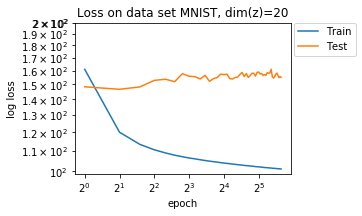

In [7]:
# Plotting train and test losses for all epochs
if dataset == "MNIST":
    plot_losses(solver, (90, 210, 10))
if dataset == "FF":
    plot_losses(solver, (330, 410, 10))
if dataset == "LFW":
    plot_losses(solver, (1150, 1260, 10))

epoch: 1, mu(z): 0.0105, stddev(z): 1.2111, var(z): 1.4668, var(mu(z)): 0.8703 E[var(q(z|x)]: 0.4153
epoch: 13, mu(z): -0.0079, stddev(z): 1.0178, var(z): 1.0360, var(mu(z)): 0.9087 E[var(q(z|x)]: 0.0258
epoch: 26, mu(z): -0.0057, stddev(z): 1.0129, var(z): 1.0259, var(mu(z)): 0.8924 E[var(q(z|x)]: 0.0306
epoch: 50, mu(z): -0.0032, stddev(z): 1.0112, var(z): 1.0225, var(mu(z)): 0.8804 E[var(q(z|x)]: 0.0375


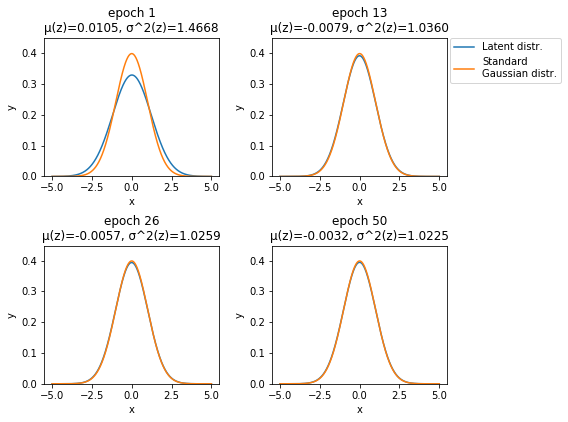

In [8]:
# Plotting histogram of the latent space's distribution, given the computed \mu and \sigma
plot_gaussian_distributions(solver)

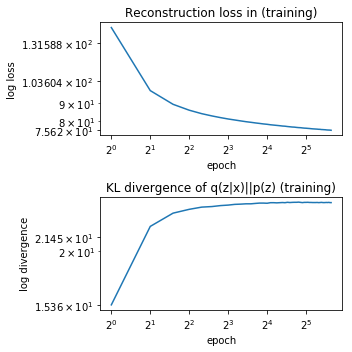

In [10]:
# Monitoring the reconstruction loss (likelihood lower bound) and KL divergence
DEBUG = 0
if DEBUG:
    for epoch, train_loss, test_loss, rl, kl in zip(solver.train_loss_history["epochs"], \
                             solver.train_loss_history["train_loss_acc"], \
                             solver.test_loss_history, \
                             solver.train_loss_history["recon_loss_acc"], \
                             solver.train_loss_history["kl_diverg_acc"]):
        print("epoch: {}, train_loss: {:.2f}, test_loss: {:.2f}, recon. loss: {:.2f}, KL div.: {:.2f}".format(
            epoch, train_loss, test_loss, rl, kl))
        print("overfitting: {:.2f}".format(abs(test_loss-train_loss)))
if dataset == "MNIST" and z_dim == 2:
    plot_rl_kl(solver, 100, 250)
if dataset == "MNIST" and z_dim == 20:
    plot_rl_kl(solver, 20, 30)
if dataset == "FF" and z_dim == 2:
    plot_rl_kl(solver, 10, 15)
if dataset == "LFW" and z_dim == 20:
    plot_rl_kl(solver, 50, 50)

In [ ]:
# visualize q(z|x) (latent space z)
if solver.z_dim == 2:
    if solver.loader.dataset != "FF":
        plot_latent_space(solver)
    else:
        plot_latent_space_no_labels(solver)
else:
    print("Plot of latent space not possible as dimension of z is not 2")

In [ ]:
# Visualizations of learned data manifold for generative models with two-dimensional latent space
if solver.z_dim == 2:
    if solver.loader.dataset == "MNIST":
        plot_latent_manifold(solver, "bone")
    if solver.loader.dataset == "LFW" or solver.loader.dataset == "FF":
        plot_latent_manifold(solver, "gray", n=10, fig_size=(10, 8))
else:
    print("Plot is not possible as dimension of z is not 2")

In [ ]:
# plots real faces and in grid samples
if dataset == "LFW" or dataset == "FF":
    plot_faces_grid(225, 15, solver)
    plot_faces_samples_grid(225, 15, solver)

In [ ]:
last_train_loss = solver.train_loss_history["train_loss_acc"][-1]
torch.save(solver, "../models/VAE_" + solver.loader.dataset + "_train_loss=" + "{0:.2f}".format(last_train_loss) + "_z=" + str(solver.z_dim) + ".pt")